In [ ]:
#Importing the Libraries
from pprint import pprint
from time import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder

## Import Files

In [ ]:
#import data from drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_csv = pd.read_csv('/content/drive/MyDrive/Data/Data Indeks Literasi - Combined.csv',
                       sep=",", 
                       decimal=",") 
data_csv.head()

,No,Provinsi,Melek Huruf,Rata-rata Lama Sekolah (RLS),Persentase perpustakaan sekolah dalam kondisi baik,Persentase petugas pengelola perpustakaan sekolah,Persentase perpustakaan umum (provinsi + kabupaten + desa) per seribu penduduk,Persentase perpustakaan komunitas per seribu penduduk,Persentase rumah tangga membeli surat kabar / koran,Persentase rumah tangga membeli majalah / tabloid,Persentase sekolah yang memiliki jaringan akses internet,Persentase Penduduk Mengakses Internet,Persentase penduduk menggunakan komputer,Persentase penduduk membaca surat kabar / koran atau majalah cetak,Persentase penduduk membaca buku cetak selain kitab suci,"Persentase penduduk membaca berita / artikel dari media elektronik, internet",Persentase penduduk mengunjungi perpustakaan,persentase penduduk memanfaatkan taman bacaan
0,1,Aceh,98.47,8.98,20.39,9.42,53.72,3.96,5.80,2.02,50.02,22.86,14.93,22.13,35.73,16.54,13.14,0.59
1,2,Bali,96.21,8.55,41.21,18.45,53.96,2.02,9.78,2.92,51.31,39.49,23.22,15.08,30.30,22.17,14.09,0.34
2,3,Banten,98.04,8.53,25.09,7.51,117.28,134.85,8.11,3.27,61.67,37.46,20.54,9.54,29.01,21.00,10.72,1.01
3,4,Bengkulu,98.63,8.47,19.20,29.85,10.51,0.93,8.56,2.73,41.63,26.71,18.54,14.14,35.03,16.05,15.28,0.90
4,5,D.I. Yogyakarta,97.09,9.19,37.64,28.46,59.43,57.77,19.76,10.08,66.27,45.38,27.43,26.62,33.93,31.09,20.15,0.59


## Exploratory Data Analysis

In [ ]:
# Check variable type
data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 18 columns):
 #   Column                                                                          Non-Null Count  Dtype 
---  ------                                                                          --------------  ----- 
 0   No                                                                              34 non-null     int64 
 1   Provinsi                                                                        34 non-null     object
 2   Melek Huruf                                                                     34 non-null     object
 3   Rata-rata Lama Sekolah (RLS)                                                    34 non-null     object
 4   Persentase perpustakaan sekolah dalam kondisi baik                              34 non-null     object
 5   Persentase petugas pengelola perpustakaan sekolah                               34 non-null     object
 6   Persentase perpustakaan umum

## Data Preparation

In [ ]:
# Menghapus kolom-kolom yang tidak diperlukan karena telah diganti dan diakumulasikan menjadi variable yang telah dibuat sebelumnya
col_del = ["Provinsi","No"]
data_csv_prepared=data_csv.drop(columns=col_del,axis=1)
data_csv_prepared.head()

,Melek Huruf,Rata-rata Lama Sekolah (RLS),Persentase perpustakaan sekolah dalam kondisi baik,Persentase petugas pengelola perpustakaan sekolah,Persentase perpustakaan umum (provinsi + kabupaten + desa) per seribu penduduk,Persentase perpustakaan komunitas per seribu penduduk,Persentase rumah tangga membeli surat kabar / koran,Persentase rumah tangga membeli majalah / tabloid,Persentase sekolah yang memiliki jaringan akses internet,Persentase Penduduk Mengakses Internet,Persentase penduduk menggunakan komputer,Persentase penduduk membaca surat kabar / koran atau majalah cetak,Persentase penduduk membaca buku cetak selain kitab suci,"Persentase penduduk membaca berita / artikel dari media elektronik, internet",Persentase penduduk mengunjungi perpustakaan,persentase penduduk memanfaatkan taman bacaan
0,98.47,8.98,20.39,9.42,53.72,3.96,5.80,2.02,50.02,22.86,14.93,22.13,35.73,16.54,13.14,0.59
1,96.21,8.55,41.21,18.45,53.96,2.02,9.78,2.92,51.31,39.49,23.22,15.08,30.30,22.17,14.09,0.34
2,98.04,8.53,25.09,7.51,117.28,134.85,8.11,3.27,61.67,37.46,20.54,9.54,29.01,21.00,10.72,1.01
3,98.63,8.47,19.20,29.85,10.51,0.93,8.56,2.73,41.63,26.71,18.54,14.14,35.03,16.05,15.28,0.90
4,97.09,9.19,37.64,28.46,59.43,57.77,19.76,10.08,66.27,45.38,27.43,26.62,33.93,31.09,20.15,0.59


In [ ]:
# Check variable type
data_csv_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 16 columns):
 #   Column                                                                          Non-Null Count  Dtype 
---  ------                                                                          --------------  ----- 
 0   Melek Huruf                                                                     34 non-null     object
 1   Rata-rata Lama Sekolah (RLS)                                                    34 non-null     object
 2   Persentase perpustakaan sekolah dalam kondisi baik                              34 non-null     object
 3   Persentase petugas pengelola perpustakaan sekolah                               34 non-null     object
 4   Persentase perpustakaan umum (provinsi + kabupaten + desa) per seribu penduduk  34 non-null     object
 5   Persentase perpustakaan komunitas per seribu penduduk                           34 non-null     object
 6   Persentase rumah tangga memb

In [ ]:
scaled_features = StandardScaler().fit_transform(data_csv_prepared.values)
scaled_features_df = pd.DataFrame(scaled_features, 
                                  index=data_csv_prepared.index, 
                                  columns=data_csv_prepared.columns)

## Handle Outlier

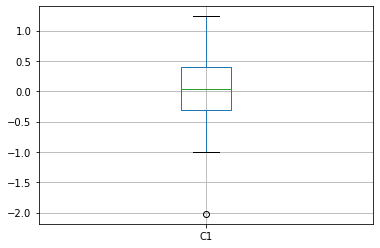

In [ ]:
dfee.boxplot(column=['C1'])

TypeError: ignored

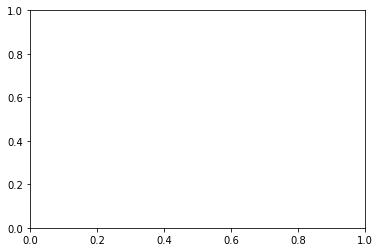

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(data_csv_prepared, vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Sample')

## KMeans Implementation 

In [ ]:
K = 2
kmeans_2 = KMeans(n_clusters=K, random_state=11)

start = time()
kmeans_2.fit(scaled_features_df)
print(f"Done fitting kMeans in {time()-start:.3f}s")

Done fitting kMeans in 0.091s


In [ ]:
K = 3
kmeans_3 = KMeans(n_clusters=K, random_state=11)

start = time()
kmeans_3.fit(scaled_features_df)
print(f"Done fitting kMeans in {time()-start:.3f}s")

Done fitting kMeans in 0.371s


In [ ]:
kmeans_cluster = data_csv_prepared.assign(
    clusters_of_2=kmeans_2.predict(scaled_features),
    clusters_of_3= kmeans_3.predict(scaled_features),
)

with pd.option_context("display.max_columns", None):
    display(kmeans_cluster)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


,Melek Huruf,Rata-rata Lama Sekolah (RLS),Persentase perpustakaan sekolah dalam kondisi baik,Persentase petugas pengelola perpustakaan sekolah,Persentase perpustakaan umum (provinsi + kabupaten + desa) per seribu penduduk,Persentase perpustakaan komunitas per seribu penduduk,Persentase rumah tangga membeli surat kabar / koran,Persentase rumah tangga membeli majalah / tabloid,Persentase sekolah yang memiliki jaringan akses internet,Persentase Penduduk Mengakses Internet,Persentase penduduk menggunakan komputer,Persentase penduduk membaca surat kabar / koran atau majalah cetak,Persentase penduduk membaca buku cetak selain kitab suci,"Persentase penduduk membaca berita / artikel dari media elektronik, internet",Persentase penduduk mengunjungi perpustakaan,persentase penduduk memanfaatkan taman bacaan,clusters_of_2,clusters_of_3
0,98.47,8.98,0.20392,0.09424,0.53725,0.03957,5.80,2.02,0.50019,22.86,14.93,22.13,35.73,16.54,13.14,0.59,0,1
1,96.21,8.55,0.41208,0.18451,0.53961,0.02018,9.78,2.92,0.51314,39.49,23.22,15.08,30.30,22.17,14.09,0.34,0,1
2,98.04,8.53,0.25092,0.07508,1.17276,1.34849,8.11,3.27,0.61666,37.46,20.54,9.54,29.01,21.00,10.72,1.01,0,1
3,98.63,8.47,0.19197,0.29847,0.10509,0.00929,8.56,2.73,0.41626,26.71,18.54,14.14,35.03,16.05,15.28,0.90,0,1
4,97.09,9.19,0.37637,0.28463,0.59427,0.57768,19.76,10.08,0.66273,45.38,27.43,26.62,33.93,31.09,20.15,0.59,1,2
5,99.49,11.02,0.48745,0.06125,0.22405,0.25657,27.56,13.06,0.66746,60.65,33.40,24.51,30.22,40.22,10.30,0.55,1,2
6,97.42,7.28,0.32832,0.03493,0.12247,0.00409,5.00,2.98,0.41362,27.31,17.61,11.87,31.04,15.40,14.76,0.83,0,1
7,98.15,8.15,0.16878,0.27090,2.33560,0.07466,9.10,3.49,0.50917,26.67,17.08,9.83,31.71,17.59,9.22,0.35,0,0
8,98.55,8.14,0.18668,0.14641,2.07600,0.51820,10.42,4.70,0.62897,37.02,19.83,11.46,28.07,18.02,10.97,0.49,0,1
9,96.01,7.27,0.23805,0.20169,0.04882,0.03216,6.32,3.16,0.58364,30.73,17.68,8.99,25.72,14.37,10.95,0.48,0,1


## Evaluation

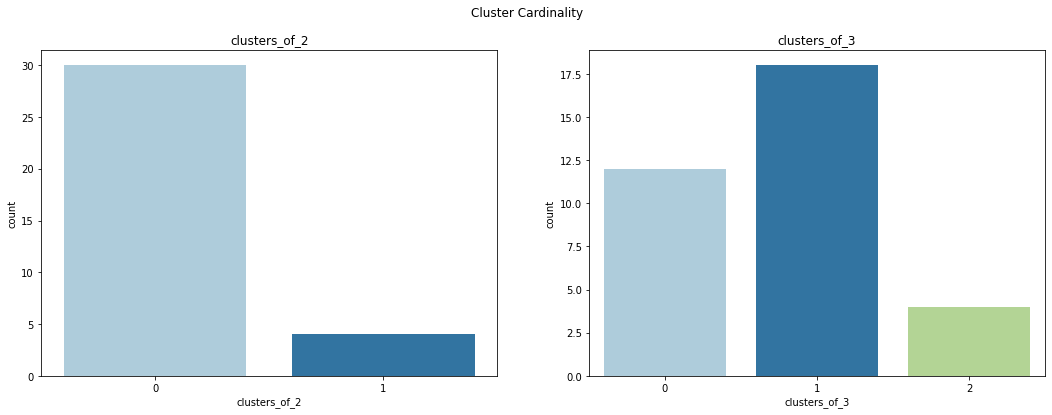

In [ ]:
fig, axis = plt.subplots(1, 2, figsize=(18, 6))
for ax, preds in zip(axis, ["clusters_of_2", "clusters_of_3"]):
    sns.countplot(x=preds, data=kmeans_cluster, ax=ax, palette="Paired")
    ax.set_title(preds)
plt.suptitle("Cluster Cardinality")
plt.show()

## Elbow Method 

In [ ]:
# sum of squared distances
ssd = []

# may take a longer time to run (takes up to approximately 6 min)
for k in range(1, 11):
    model = KMeans(n_clusters=k, random_state=11)
    print(f"Clustering with n_clusters={k}")
    start = time()
    model.fit(scaled_features)
    print(f"Done clustering in {time()-start:.3f}s")

    ssd.append(model.inertia_)

Clustering with n_clusters=1
Done clustering in 0.012s
Clustering with n_clusters=2
Done clustering in 0.080s
Clustering with n_clusters=3
Done clustering in 0.141s
Clustering with n_clusters=4
Done clustering in 0.094s
Clustering with n_clusters=5
Done clustering in 0.132s
Clustering with n_clusters=6
Done clustering in 0.358s
Clustering with n_clusters=7
Done clustering in 0.238s
Clustering with n_clusters=8
Done clustering in 0.034s
Clustering with n_clusters=9
Done clustering in 0.025s
Clustering with n_clusters=10
Done clustering in 0.030s


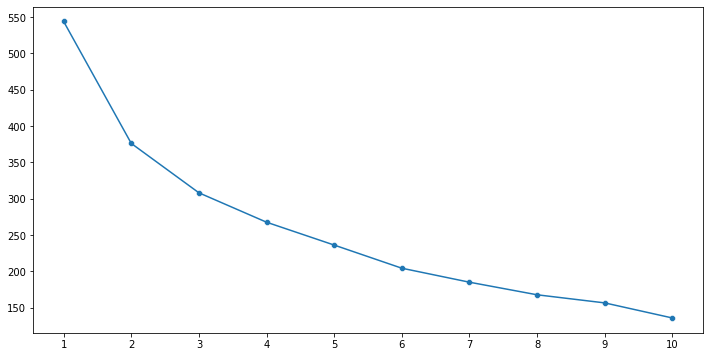

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=range(1, 11), y=ssd)
sns.scatterplot(x=range(1, 11), y=ssd)
plt.xticks(range(1, 11))
plt.show()

## Silhouette Score

In [ ]:
from sklearn.metrics import silhouette_score 
silhouette_scores = []

# INFORMATION
# It may take a longer time to run, the sample data took around 46m 30s to be completed

for k in range(2, 11):
    model = KMeans(n_clusters=k, random_state=11)
    print(f"Clustering with n_clusters={k}")
    start = time()
    model.fit(scaled_features_df)
    print(f"Done clustering in {time()-start:.3f}s")

    print("Calculating silhouette coefficient..")
    start = time()
    silhouette_scores.append(silhouette_score(scaled_features_df, model.labels_))
    print(f"Done calculating in {time()-start:.3f}s")

Clustering with n_clusters=2
Done clustering in 0.267s
Calculating silhouette coefficient..
Done calculating in 0.008s
Clustering with n_clusters=3
Done clustering in 0.296s
Calculating silhouette coefficient..
Done calculating in 0.004s
Clustering with n_clusters=4
Done clustering in 0.220s
Calculating silhouette coefficient..
Done calculating in 0.004s
Clustering with n_clusters=5
Done clustering in 0.285s
Calculating silhouette coefficient..
Done calculating in 0.008s
Clustering with n_clusters=6
Done clustering in 0.062s
Calculating silhouette coefficient..
Done calculating in 0.009s
Clustering with n_clusters=7
Done clustering in 0.061s
Calculating silhouette coefficient..
Done calculating in 0.009s
Clustering with n_clusters=8
Done clustering in 0.156s
Calculating silhouette coefficient..
Done calculating in 0.004s
Clustering with n_clusters=9
Done clustering in 0.131s
Calculating silhouette coefficient..
Done calculating in 0.010s
Clustering with n_clusters=10
Done clustering in

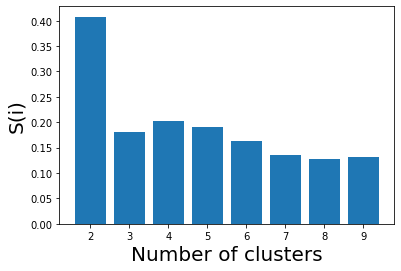

In [ ]:
silhouette_scores = []
for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(scaled_features_df)
    silhouette_scores.append(silhouette_score(scaled_features_df, m1.fit_predict(scaled_features_df))) 
plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [ ]:
silhouette_scores

[0.407827143693443,
 0.18101365321012605,
 0.20294611386153377,
 0.19103708825856125,
 0.16397479035480825,
 0.1354948461023419,
 0.12664901048144128,
 0.13253114586360623]

In [ ]:
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)

Number of Cluster Required is :  2


In [ ]:
kmeans=KMeans(n_clusters=number_of_clusters, random_state=42).fit(scaled_features_df)
pred=kmeans.predict(scaled_features_df)

In [ ]:
data_csv_prepared_copy = data_csv_prepared.copy()

In [ ]:
data_csv_prepared_copy['cluster'] = pred + 1

In [ ]:
data_csv_prepared_copy.head()

,Melek Huruf,Rata-rata Lama Sekolah (RLS),Persentase perpustakaan sekolah dalam kondisi baik,Persentase petugas pengelola perpustakaan sekolah,Persentase perpustakaan umum (provinsi + kabupaten + desa) per seribu penduduk,Persentase perpustakaan komunitas per seribu penduduk,Persentase rumah tangga membeli surat kabar / koran,Persentase rumah tangga membeli majalah / tabloid,Persentase sekolah yang memiliki jaringan akses internet,Persentase Penduduk Mengakses Internet,Persentase penduduk menggunakan komputer,Persentase penduduk membaca surat kabar / koran atau majalah cetak,Persentase penduduk membaca buku cetak selain kitab suci,"Persentase penduduk membaca berita / artikel dari media elektronik, internet",Persentase penduduk mengunjungi perpustakaan,persentase penduduk memanfaatkan taman bacaan,cluster
0,98.47,8.98,0.20392,0.09424,0.53725,0.03957,5.80,2.02,0.50019,22.86,14.93,22.13,35.73,16.54,13.14,0.59,1
1,96.21,8.55,0.41208,0.18451,0.53961,0.02018,9.78,2.92,0.51314,39.49,23.22,15.08,30.30,22.17,14.09,0.34,1
2,98.04,8.53,0.25092,0.07508,1.17276,1.34849,8.11,3.27,0.61666,37.46,20.54,9.54,29.01,21.00,10.72,1.01,1
3,98.63,8.47,0.19197,0.29847,0.10509,0.00929,8.56,2.73,0.41626,26.71,18.54,14.14,35.03,16.05,15.28,0.90,1
4,97.09,9.19,0.37637,0.28463,0.59427,0.57768,19.76,10.08,0.66273,45.38,27.43,26.62,33.93,31.09,20.15,0.59,2


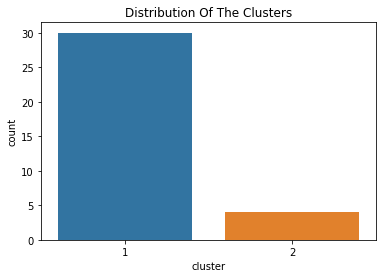

In [ ]:
pl = sns.countplot(x=data_csv_prepared_copy["cluster"])
pl.set_title("Distribution Of The Clusters")
plt.show()